In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import re 
import pickle


# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../EDA/heart_data_2022_location_version_2.csv")
print(df.shape)
df.head()

(243565, 43)


,Unnamed: 0,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,latitude,longitude
0,0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,32.318231,-86.902298
1,1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,32.318231,-86.902298
2,2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,32.318231,-86.902298
3,3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,32.318231,-86.902298
4,4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,32.318231,-86.902298


In [3]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                   0
State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightIn

In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243565 entries, 0 to 243564
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 243565 non-null  int64  
 1   State                      243565 non-null  object 
 2   Sex                        243565 non-null  object 
 3   GeneralHealth              243565 non-null  object 
 4   PhysicalHealthDays         243565 non-null  float64
 5   MentalHealthDays           243565 non-null  float64
 6   LastCheckupTime            243565 non-null  object 
 7   PhysicalActivities         243565 non-null  object 
 8   SleepHours                 243565 non-null  float64
 9   RemovedTeeth               243565 non-null  object 
 10  HadHeartAttack             243565 non-null  object 
 11  HadAngina                  243565 non-null  object 
 12  HadStroke                  243565 non-null  object 
 13  HadAsthma                  24

In [5]:
 # Select string columns
string_cols = df.select_dtypes(include=['object'])

# Count unique categories for each string column
unique_counts = string_cols.nunique()
unique_counts

State                        54
Sex                           2
GeneralHealth                 5
LastCheckupTime               4
PhysicalActivities            2
RemovedTeeth                  4
HadHeartAttack                2
HadAngina                     2
HadStroke                     2
HadAsthma                     2
HadSkinCancer                 2
HadCOPD                       2
HadDepressiveDisorder         2
HadKidneyDisease              2
HadArthritis                  2
HadDiabetes                   4
DeafOrHardOfHearing           2
BlindOrVisionDifficulty       2
DifficultyConcentrating       2
DifficultyWalking             2
DifficultyDressingBathing     2
DifficultyErrands             2
SmokerStatus                  4
ECigaretteUsage               4
ChestScan                     2
RaceEthnicityCategory         5
AgeCategory                  13
AlcoholDrinkers               2
HIVTesting                    2
FluVaxLast12                  2
PneumoVaxEver                 2
TetanusL

In [6]:
df.head()

,Unnamed: 0,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,latitude,longitude
0,0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,32.318231,-86.902298
1,1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,32.318231,-86.902298
2,2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,32.318231,-86.902298
3,3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,32.318231,-86.902298
4,4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,32.318231,-86.902298


In [7]:
df.Sex.value_counts()

Sex
Female    126530
Male      117035
Name: count, dtype: int64

In [8]:
 df.groupby("Sex").BMI.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,126530.0,28.608271,6.952836,12.50,23.62,27.44,32.22,85.69
Male,117035.0,28.681030,5.713640,12.27,24.96,27.80,31.57,85.80


In [9]:
df.groupby("Sex").PhysicalHealthDays.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,126530.0,4.427819,8.553533,0.0,0.0,0.0,4.0,30.0
Male,117035.0,3.684282,8.101623,0.0,0.0,0.0,2.0,30.0


In [10]:
df.groupby("Sex").MentalHealthDays.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,126530.0,4.842338,8.514740,0.0,0.0,0.0,5.0,30.0
Male,117035.0,3.356329,7.440532,0.0,0.0,0.0,2.0,30.0


In [11]:
df.groupby("Sex").SleepHours.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,126530.0,7.043792,1.322644,3.0,6.0,7.0,8.0,13.0
Male,117035.0,7.008143,1.283056,3.0,6.0,7.0,8.0,13.0


In [12]:
 # Dealing with Strings
# Ticket, Name, Embarked, Sex, (Pclass), Has_Cabin
# Only four are categories: Embarked, Sex, PClass, Has_Cabin

# DROP: Ticket & Name columns
# Future work: Extract the titles from the NAME column to use as an additional category
cols_to_drop = ["Unnamed: 0", "latitude", "longitude"]
df.drop(columns=cols_to_drop, inplace=True)
# 
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243565 entries, 0 to 243564
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      243565 non-null  object 
 1   Sex                        243565 non-null  object 
 2   GeneralHealth              243565 non-null  object 
 3   PhysicalHealthDays         243565 non-null  float64
 4   MentalHealthDays           243565 non-null  float64
 5   LastCheckupTime            243565 non-null  object 
 6   PhysicalActivities         243565 non-null  object 
 7   SleepHours                 243565 non-null  float64
 8   RemovedTeeth               243565 non-null  object 
 9   HadHeartAttack             243565 non-null  object 
 10  HadAngina                  243565 non-null  object 
 11  HadStroke                  243565 non-null  object 
 12  HadAsthma                  243565 non-null  object 
 13  HadSkinCancer              24

In [14]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [15]:
df.head(4)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [16]:
# Determine the number of unique values in each column.
cols = ["State","Sex",	"GeneralHealth", "PhysicalHealthDays", "MentalHealthDays",	"LastCheckupTime", "PhysicalActivities", "SleepHours", 
        "RemovedTeeth", "HadHeartAttack",	"HadAngina", "HadStroke", "HadAsthma", "HadSkinCancer",	"HadCOPD",	"HadDepressiveDisorder",	
        "HadKidneyDisease", "HadArthritis",	"HadDiabetes", "DeafOrHardOfHearing", "BlindOrVisionDifficulty",	"DifficultyConcentrating",	
        "DifficultyWalking",  "DifficultyDressingBathing",	"DifficultyErrands",	"SmokerStatus", "ECigaretteUsage", "ChestScan",	
        "RaceEthnicityCategory",	"AgeCategory", "HeightInMeters","WeightInKilograms", "BMI", "AlcoholDrinkers", "HIVTesting", "FluVaxLast12", 
        "PneumoVaxEver", "TetanusLast10Tdap", "HighRiskLastYear", "CovidPos"]

for col in cols:
  print(col)
  print(df[col].nunique())
  print(df[col].value_counts())
  print()

State
54
State
Washington              14866
Minnesota                9097
Maryland                 9062
Ohio                     8904
New York                 8815
Texas                    7306
Florida                  7232
Kansas                   6114
Wisconsin                6093
Maine                    5958
Iowa                     5622
Hawaii                   5526
Virginia                 5514
Indiana                  5437
Arizona                  5418
Massachusetts            5414
South Carolina           5388
Utah                     5334
Michigan                 5317
Colorado                 5113
Nebraska                 5067
California               5039
Connecticut              5003
Georgia                  4913
Vermont                  4797
South Dakota             4372
Montana                  4224
Missouri                 4152
New Jersey               3920
New Hampshire            3727
Puerto Rico              3566
Idaho                    3444
Alaska                   

In [17]:
 # Encoding, separate out features
meta = ['HadHeartAttack']
num_features = ['PhysicalHealthDays', 'SleepHours', 'BMI', 'MentalHealthDays','AgeCategory']
cat_features = ['Sex', 'RaceEthnicityCategory','SmokerStatus','AlcoholDrinkers','GeneralHealth']

In [18]:
df_meta= df.loc[:, meta]
df_meta.describe()

,HadHeartAttack
count,243565
unique,2
top,No
freq,230388


In [19]:
df_meta['HadHeartAttack'] = df_meta.HadHeartAttack.apply(lambda x: 0 if x == "Yes" else 1)
df_meta.head()

,HadHeartAttack
0,1
1,1
2,1
3,1
4,1


In [20]:
# NUMERIC FIRST - Do we need a SCALER?
df_num = df.loc[:, num_features]
df_num.describe()

,PhysicalHealthDays,SleepHours,BMI,MentalHealthDays
count,243565.000000,243565.000000,243565.000000,243565.000000
mean,4.070544,7.026662,28.643232,4.128298
std,8.347696,1.303891,6.387559,8.050850
min,0.000000,3.000000,12.270000,0.000000
25%,0.000000,6.000000,24.280000,0.000000
50%,0.000000,7.000000,27.460000,0.000000
75%,3.000000,8.000000,31.890000,4.000000
max,30.000000,13.000000,85.800000,30.000000


In [21]:
# Categorical Up Next
df_cat = df.loc[:, cat_features]
df_cat.head()

,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
0,Female,"White only, Non-Hispanic",Former smoker,No,Very good
1,Male,"White only, Non-Hispanic",Former smoker,No,Very good
2,Male,"White only, Non-Hispanic",Former smoker,Yes,Very good
3,Female,"White only, Non-Hispanic",Never smoked,No,Fair
4,Female,"White only, Non-Hispanic",Never smoked,No,Good


In [22]:
# Label Encode SEX
df_cat["Sex"] = df_cat.Sex.apply(lambda x: 0 if x == "Male" else 1)
df_cat.head()

,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
0,1,"White only, Non-Hispanic",Former smoker,No,Very good
1,0,"White only, Non-Hispanic",Former smoker,No,Very good
2,0,"White only, Non-Hispanic",Former smoker,Yes,Very good
3,1,"White only, Non-Hispanic",Never smoked,No,Fair
4,1,"White only, Non-Hispanic",Never smoked,No,Good


In [23]:
# Label Encode SEX
df_cat["AlcoholDrinkers"] = df_cat.AlcoholDrinkers.apply(lambda x: 0 if x == "Yes" else 1)
df_cat.head()

,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
0,1,"White only, Non-Hispanic",Former smoker,1,Very good
1,0,"White only, Non-Hispanic",Former smoker,1,Very good
2,0,"White only, Non-Hispanic",Former smoker,0,Very good
3,1,"White only, Non-Hispanic",Never smoked,1,Fair
4,1,"White only, Non-Hispanic",Never smoked,1,Good


In [24]:
df_cat.RaceEthnicityCategory.value_counts()

RaceEthnicityCategory
White only, Non-Hispanic         184816
Hispanic                          22243
Black only, Non-Hispanic          19013
Other race only, Non-Hispanic     11977
Multiracial, Non-Hispanic          5516
Name: count, dtype: int64

In [25]:
print(type(cat_features))
cat_features = pd.DataFrame(cat_features)

<class 'list'>


In [26]:
# Label Encode RaceEthnicityCategory
df_cat.RaceEthnicityCategory.replace({
    "White only, Non-Hispanic": 0,
    "Hispanic": 1,
    "Black only, Non-Hispanic": 2,
    "Other race only, Non-Hispanic": 3,
    "Multiracial, Non-Hispanic": 4
}, inplace =True)
df_cat.head()

,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
0,1,0,Former smoker,1,Very good
1,0,0,Former smoker,1,Very good
2,0,0,Former smoker,0,Very good
3,1,0,Never smoked,1,Fair
4,1,0,Never smoked,1,Good


In [27]:
df_num.AgeCategory.replace({
"Age 18 to 24": 21,
"Age 25 to 29": 27,
"Age 30 to 34": 32,
"Age 35 to 39": 37,
"Age 40 to 44": 42,
"Age 45 to 49": 47,
"Age 50 to 54": 52,
"Age 55 to 59": 57,
"Age 60 to 64": 62,
"Age 65 to 69": 67,
"Age 70 to 74": 72,
"Age 75 to 79":77,
"Age 80 or older":83}, inplace=True)# 83 Is chosen beacuse from census data available on census.gov for 2020 83 is the median age for this age group
df_cat.head()

,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
0,1,0,Former smoker,1,Very good
1,0,0,Former smoker,1,Very good
2,0,0,Former smoker,0,Very good
3,1,0,Never smoked,1,Fair
4,1,0,Never smoked,1,Good


In [28]:
df_cat.GeneralHealth.replace({
    "Excellent": 0,
    "Very good": 1,
    "Good": 2,
    "Fair": 3,
    "Poor": 4}, inplace=True)
df_cat.head()

,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
0,1,0,Former smoker,1,1
1,0,0,Former smoker,1,1
2,0,0,Former smoker,0,1
3,1,0,Never smoked,1,3
4,1,0,Never smoked,1,2


In [29]:
df_cat.SmokerStatus.replace({
    "Former smoker" : 1,
    "Never smoked" : 1,
    "Current smoker - now smokes every day": 0,
    "Current smoker - now smokes some days": 0}, inplace=True)
df_cat.head()

,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
0,1,0,1,1,1
1,0,0,1,1,1
2,0,0,1,0,1
3,1,0,1,1,3
4,1,0,1,1,2


In [30]:
# # Put Everything Back Together
# df_final = df.loc[:,meta]
df_final = pd.concat([df_meta, df_num], axis=1)
df_final = pd.concat([df_final, df_cat], axis=1)
df_final.head()

,HadHeartAttack,PhysicalHealthDays,SleepHours,BMI,MentalHealthDays,AgeCategory,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
0,1,4.0,9.0,27.99,0.0,67,1,0,1,1,1
1,1,0.0,6.0,30.13,0.0,72,0,0,1,1,1
2,1,0.0,8.0,31.66,0.0,77,0,0,1,0,1
3,1,5.0,9.0,31.32,0.0,83,1,0,1,1,3
4,1,3.0,5.0,33.07,15.0,83,1,0,1,1,2


In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243565 entries, 0 to 243564
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HadHeartAttack         243565 non-null  int64  
 1   PhysicalHealthDays     243565 non-null  float64
 2   SleepHours             243565 non-null  float64
 3   BMI                    243565 non-null  float64
 4   MentalHealthDays       243565 non-null  float64
 5   AgeCategory            243565 non-null  int64  
 6   Sex                    243565 non-null  int64  
 7   RaceEthnicityCategory  243565 non-null  int64  
 8   SmokerStatus           243565 non-null  int64  
 9   AlcoholDrinkers        243565 non-null  int64  
 10  GeneralHealth          243565 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 20.4 MB


In [32]:
 # YES we need a scaler

# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_num)

# predict/transform
scaled_data = scaler.transform(df_num)
df_scaled = pd.DataFrame(scaled_data, columns=num_features)

df_scaled.head()

,PhysicalHealthDays,SleepHours,BMI,MentalHealthDays,AgeCategory
0,-0.008451,1.513425,-0.102267,-0.512779,0.649983
1,-0.487626,-0.787385,0.232760,-0.512779,0.934952
2,-0.487626,0.746489,0.472289,-0.512779,1.219920
3,0.111343,1.513425,0.419060,-0.512779,1.561883
4,-0.128244,-1.554322,0.693031,1.350382,1.561883


In [33]:
### catagorical coding for health and age in one column each... Example age avg 72 (mind point)

In [34]:
# Feature selection
# correlation analysis
corrs = df_final.corr()
corrs

,HadHeartAttack,PhysicalHealthDays,SleepHours,BMI,MentalHealthDays,AgeCategory,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
HadHeartAttack,1.000000,-0.131578,-0.001165,-0.029886,-0.023595,-0.172587,0.073428,0.014651,0.039147,-0.073535,-0.184217
PhysicalHealthDays,-0.131578,1.000000,-0.070641,0.115967,0.301920,0.089795,0.044502,0.004167,-0.092249,0.127875,0.485278
SleepHours,-0.001165,-0.070641,1.000000,-0.066295,-0.150392,0.133910,0.013660,-0.082285,0.072576,-0.002327,-0.085266
BMI,-0.029886,0.115967,-0.066295,1.000000,0.081954,-0.023462,-0.005691,0.026325,0.018893,0.070963,0.245651
MentalHealthDays,-0.023595,0.301920,-0.150392,0.081954,1.000000,-0.191241,0.092219,0.031791,-0.124653,0.023837,0.264125
AgeCategory,-0.172587,0.089795,0.133910,-0.023462,-0.191241,1.000000,0.053576,-0.176068,0.057860,0.123624,0.131299
Sex,0.073428,0.044502,0.013660,-0.005691,0.092219,0.053576,1.000000,0.009214,0.014668,0.093235,0.017880
RaceEthnicityCategory,0.014651,0.004167,-0.082285,0.026325,0.031791,-0.176068,0.009214,1.000000,-0.031757,0.075307,0.057340
SmokerStatus,0.039147,-0.092249,0.072576,0.018893,-0.124653,0.057860,0.014668,-0.031757,1.000000,-0.011888,-0.135023
AlcoholDrinkers,-0.073535,0.127875,-0.002327,0.070963,0.023837,0.123624,0.093235,0.075307,-0.011888,1.000000,0.176498


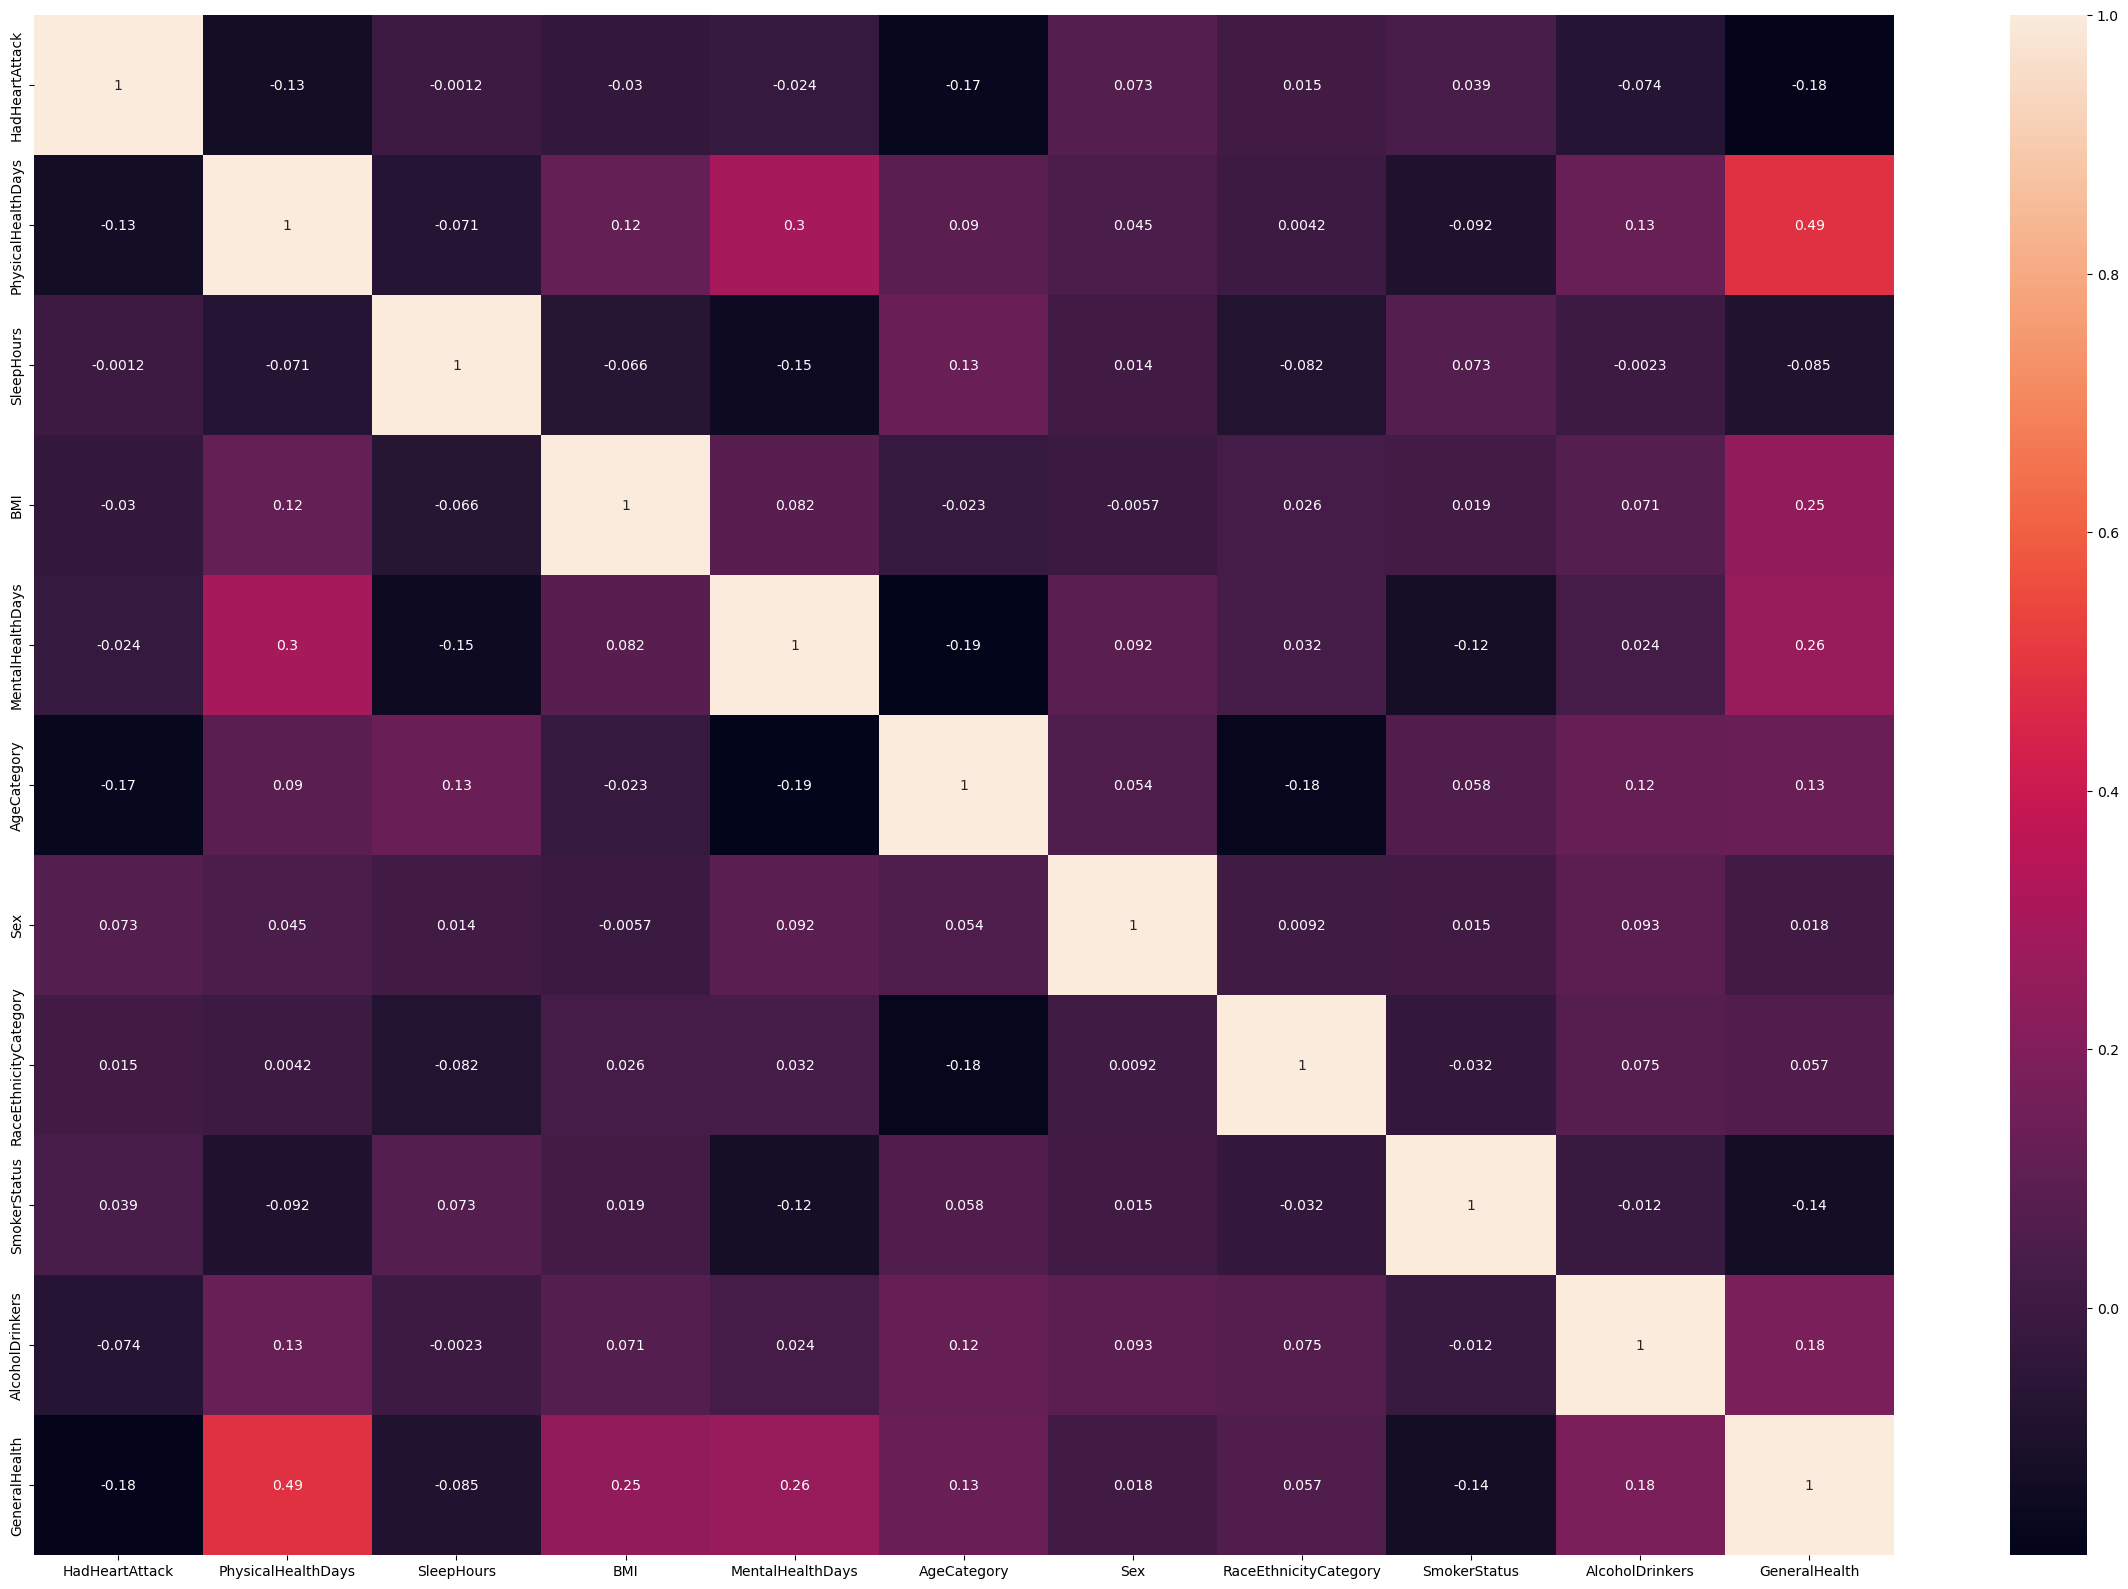

In [35]:
plt.figure(figsize=(30,20))
sns.heatmap(corrs, annot=True)
plt.show()

In [36]:
 abs(corrs.HadHeartAttack).sort_values(ascending=False)

HadHeartAttack           1.000000
GeneralHealth            0.184217
AgeCategory              0.172587
PhysicalHealthDays       0.131578
AlcoholDrinkers          0.073535
Sex                      0.073428
SmokerStatus             0.039147
BMI                      0.029886
MentalHealthDays         0.023595
RaceEthnicityCategory    0.014651
SleepHours               0.001165
Name: HadHeartAttack, dtype: float64

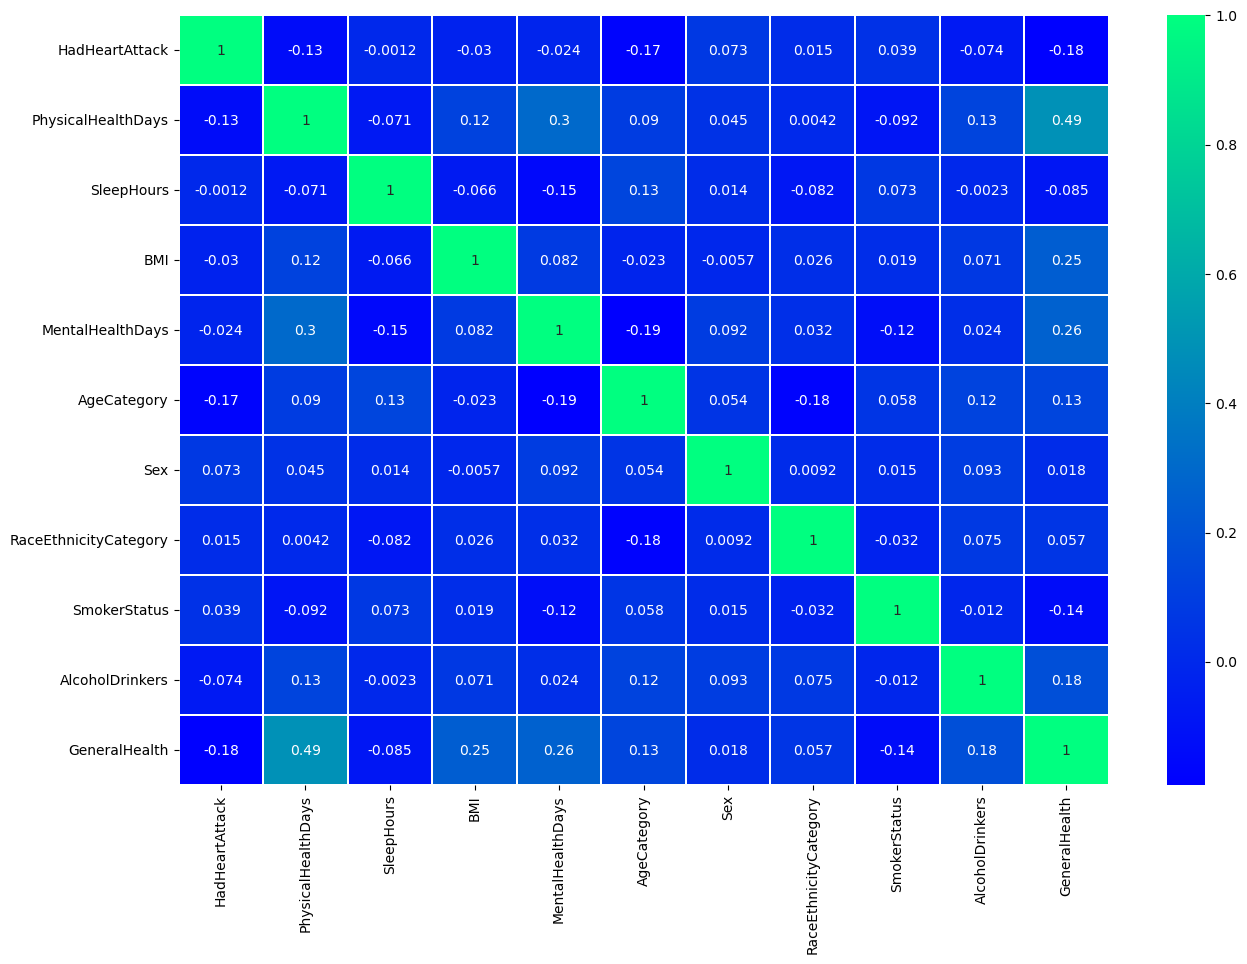

<Figure size 640x480 with 0 Axes>

In [37]:
# sources or inspiration https://www.analyticsvidhya.com/blog/2022/02/heart-disease-prediction-using-machine-learning-2/
plt.figure(figsize=(15,10))
sns.heatmap(df_final.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

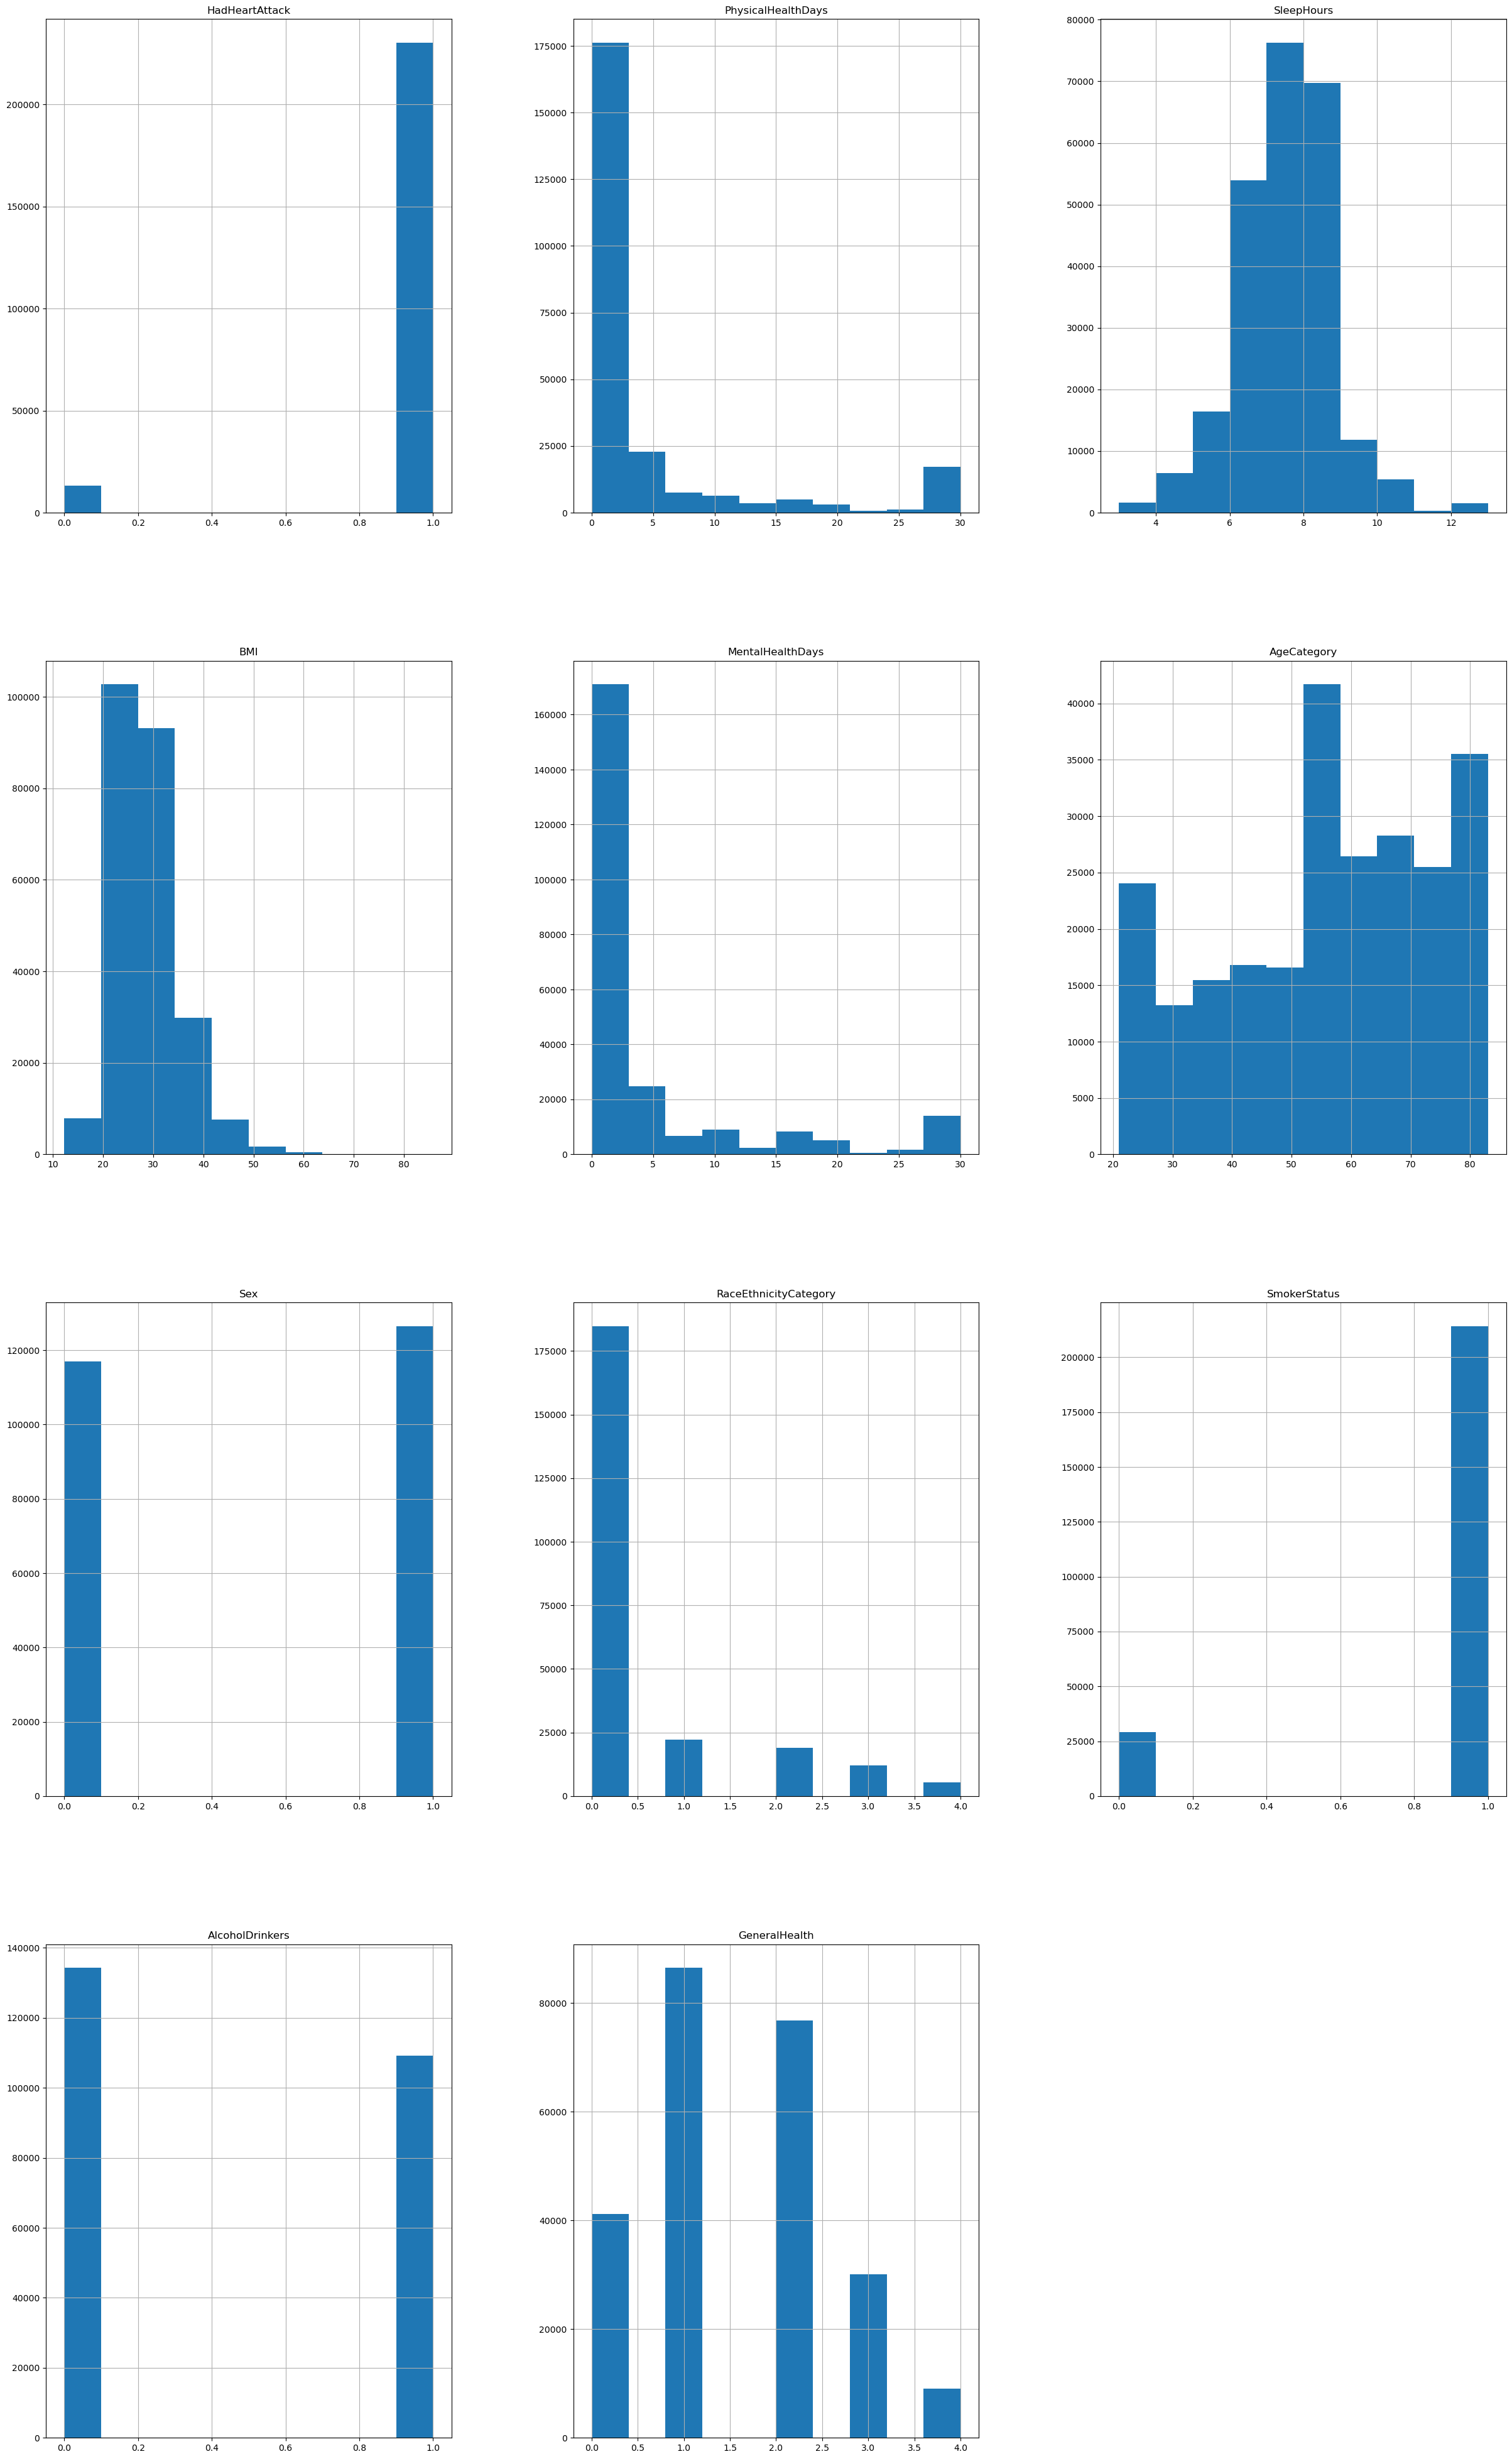

In [38]:
df_final.hist(figsize=(30,50))
plt.savefig('featuresplot')

In [39]:
# Step 1: Get the data
X = df_final.drop(columns=["HadHeartAttack"])
y = df_final.HadHeartAttack

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(182673, 10) (60892, 10)


In [40]:
X_train.head()

,PhysicalHealthDays,SleepHours,BMI,MentalHealthDays,AgeCategory,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
11902,0.0,8.0,25.09,5.0,72,1,0,1,0,1
82982,2.0,9.0,20.18,3.0,32,1,0,1,0,0
120442,5.0,7.0,21.87,0.0,67,1,0,0,1,1
168691,0.0,5.0,31.14,10.0,32,0,0,1,0,1
6531,0.0,7.0,32.92,0.0,57,1,3,1,1,2


In [41]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
[]


In [42]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[    35   9848]
 [    57 172733]]
    
    AUC: 0.8106235597851421

    Classification Report:
                  precision    recall  f1-score   support

           0       0.38      0.00      0.01      9883
           1       0.95      1.00      0.97    172790

    accuracy                           0.95    182673
   macro avg       0.66      0.50      0.49    182673
weighted avg       0.92      0.95      0.92    182673

    
TEST METRICS
    Confusion Matrix: 
    [[    6  3288]
 [   16 57582]]
    
    AUC: 0.8053987994127082

    Classification Report:
                  precision    recall  f1-score   support

           0       0.27      0.00      0.00      3294
           1       0.95      1.00      0.97     57598

    accuracy                           0.95     60892
   macro avg       0.61      0.50      0.49     60892
weighted avg       0.91      0.95      0.92     60892

    


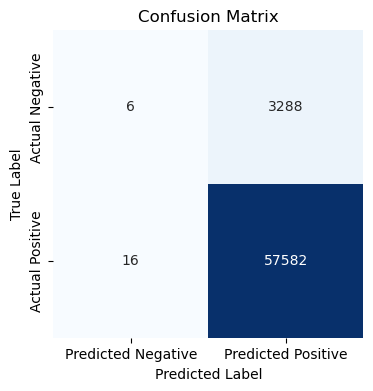

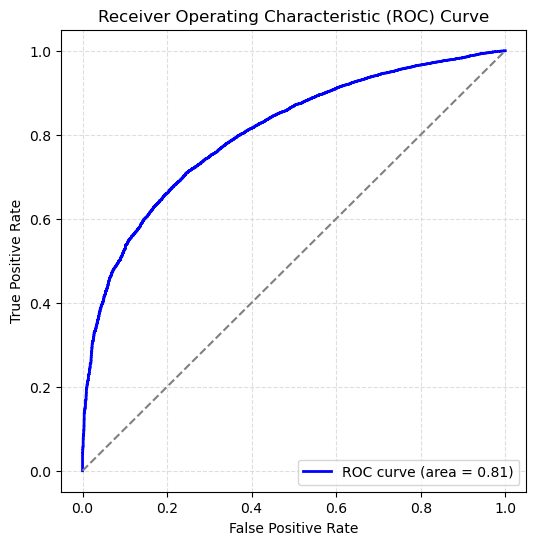

In [43]:
# Step 2: Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[  9564    319]
 [   474 172316]]
    
    AUC: 0.9997790653335149

    Classification Report:
                  precision    recall  f1-score   support

           0       0.95      0.97      0.96      9883
           1       1.00      1.00      1.00    172790

    accuracy                           1.00    182673
   macro avg       0.98      0.98      0.98    182673
weighted avg       1.00      1.00      1.00    182673

    
TEST METRICS
    Confusion Matrix: 
    [[  534  2760]
 [ 3275 54323]]
    
    AUC: 0.5543714170909217

    Classification Report:
                  precision    recall  f1-score   support

           0       0.14      0.16      0.15      3294
           1       0.95      0.94      0.95     57598

    accuracy                           0.90     60892
   macro avg       0.55      0.55      0.55     60892
weighted avg       0.91      0.90      0.90     60892

    


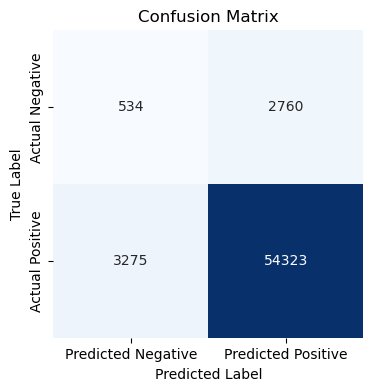

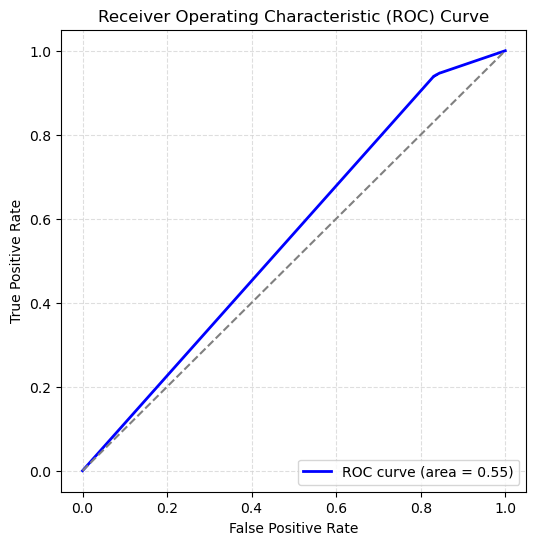

In [44]:
# Step 2: Init the Model
dt = DecisionTreeClassifier(random_state=42)

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[  9163    720]
 [    83 172707]]
    
    AUC: 0.9995751651460814

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      0.93      0.96      9883
           1       1.00      1.00      1.00    172790

    accuracy                           1.00    182673
   macro avg       0.99      0.96      0.98    182673
weighted avg       1.00      1.00      1.00    182673

    
TEST METRICS
    Confusion Matrix: 
    [[  176  3118]
 [  782 56816]]
    
    AUC: 0.7376682259952483

    Classification Report:
                  precision    recall  f1-score   support

           0       0.18      0.05      0.08      3294
           1       0.95      0.99      0.97     57598

    accuracy                           0.94     60892
   macro avg       0.57      0.52      0.52     60892
weighted avg       0.91      0.94      0.92     60892

    


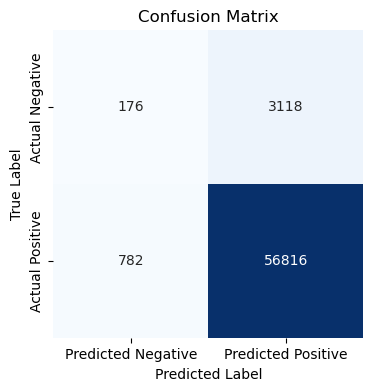

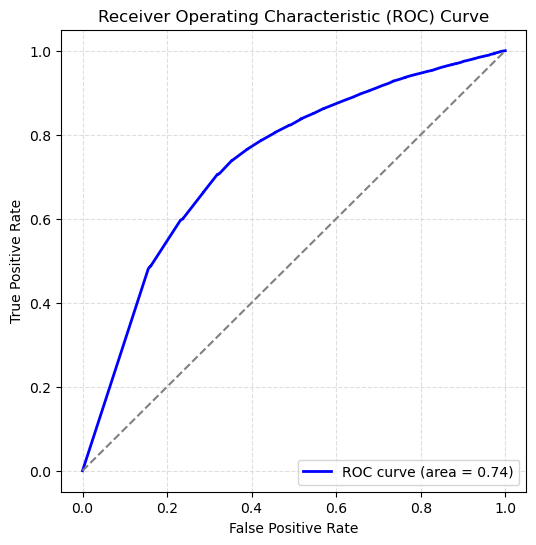

In [45]:
# Step 2: Init the Model
rf = RandomForestClassifier(random_state=42)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[     0   9883]
 [     0 172790]]
    
    AUC: 0.4033882216832478

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00      9883
           1       0.95      1.00      0.97    172790

    accuracy                           0.95    182673
   macro avg       0.47      0.50      0.49    182673
weighted avg       0.89      0.95      0.92    182673

    
TEST METRICS
    Confusion Matrix: 
    [[    0  3294]
 [    0 57598]]
    
    AUC: 0.39063229696656177

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00      3294
           1       0.95      1.00      0.97     57598

    accuracy                           0.95     60892
   macro avg       0.47      0.50      0.49     60892
weighted avg       0.89      0.95      0.92     60892

    


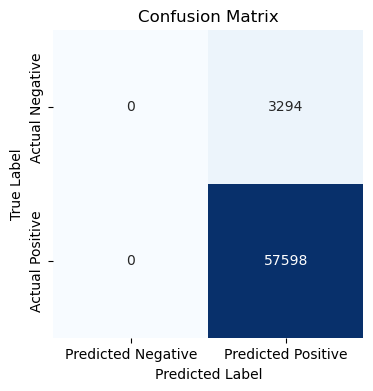

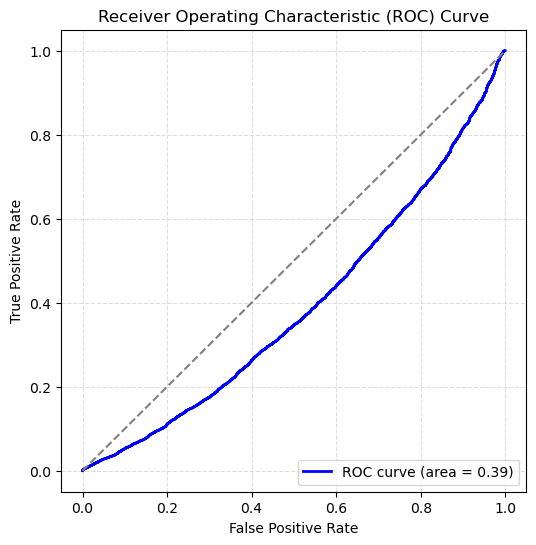

In [46]:
 # Step 2: Init the Model
svc = SVC(probability=True)

# Do Machine Learning
doClassification(svc, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[    43   9840]
 [    23 172767]]
    
    AUC: 0.8808046727298549

    Classification Report:
                  precision    recall  f1-score   support

           0       0.65      0.00      0.01      9883
           1       0.95      1.00      0.97    172790

    accuracy                           0.95    182673
   macro avg       0.80      0.50      0.49    182673
weighted avg       0.93      0.95      0.92    182673

    
TEST METRICS
    Confusion Matrix: 
    [[    6  3288]
 [   10 57588]]
    
    AUC: 0.7115281337877866

    Classification Report:
                  precision    recall  f1-score   support

           0       0.38      0.00      0.00      3294
           1       0.95      1.00      0.97     57598

    accuracy                           0.95     60892
   macro avg       0.66      0.50      0.49     60892
weighted avg       0.92      0.95      0.92     60892

    


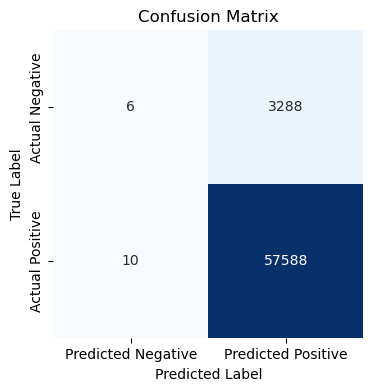

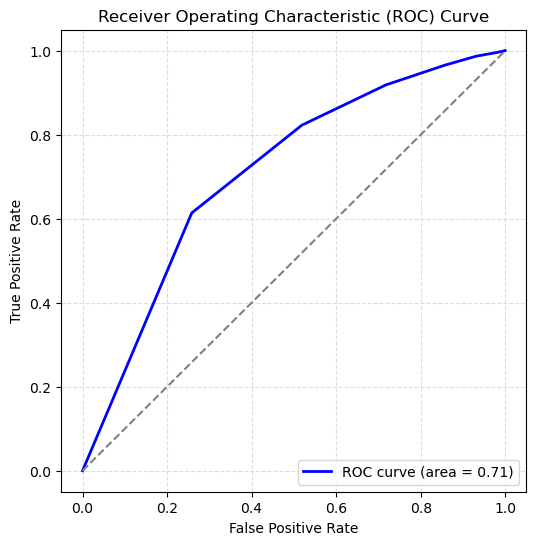

In [47]:
 # Step 2: Init the Model
knn = KNeighborsClassifier(n_neighbors=15)

# Do Machine Learning
doClassification(knn, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[  9564    319]
 [   474 172316]]
    
    AUC: 0.9997790653335149

    Classification Report:
                  precision    recall  f1-score   support

           0       0.95      0.97      0.96      9883
           1       1.00      1.00      1.00    172790

    accuracy                           1.00    182673
   macro avg       0.98      0.98      0.98    182673
weighted avg       1.00      1.00      1.00    182673

    
TEST METRICS
    Confusion Matrix: 
    [[  257  3037]
 [ 1464 56134]]
    
    AUC: 0.7014823873054521

    Classification Report:
                  precision    recall  f1-score   support

           0       0.15      0.08      0.10      3294
           1       0.95      0.97      0.96     57598

    accuracy                           0.93     60892
   macro avg       0.55      0.53      0.53     60892
weighted avg       0.91      0.93      0.91     60892

    


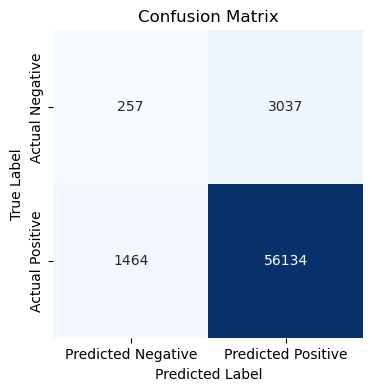

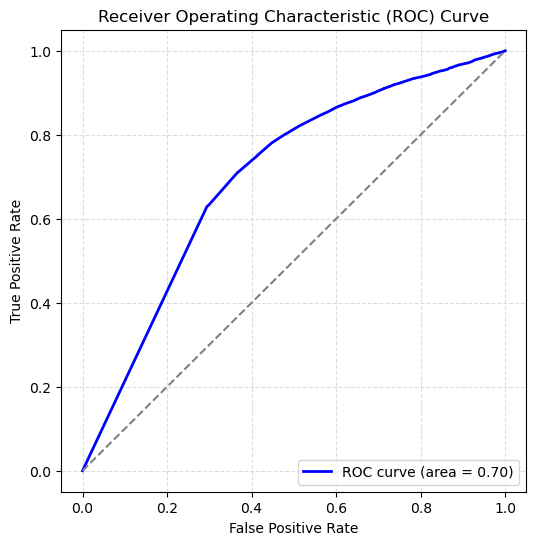

In [48]:
 # Step 2: Init the Model
et = ExtraTreesClassifier(random_state=42)

# Do Machine Learning
doClassification(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[   109   9774]
 [   178 172612]]
    
    AUC: 0.819223847190847

    Classification Report:
                  precision    recall  f1-score   support

           0       0.38      0.01      0.02      9883
           1       0.95      1.00      0.97    172790

    accuracy                           0.95    182673
   macro avg       0.66      0.50      0.50    182673
weighted avg       0.92      0.95      0.92    182673

    
TEST METRICS
    Confusion Matrix: 
    [[   32  3262]
 [   66 57532]]
    
    AUC: 0.8130606255028122

    Classification Report:
                  precision    recall  f1-score   support

           0       0.33      0.01      0.02      3294
           1       0.95      1.00      0.97     57598

    accuracy                           0.95     60892
   macro avg       0.64      0.50      0.50     60892
weighted avg       0.91      0.95      0.92     60892

    


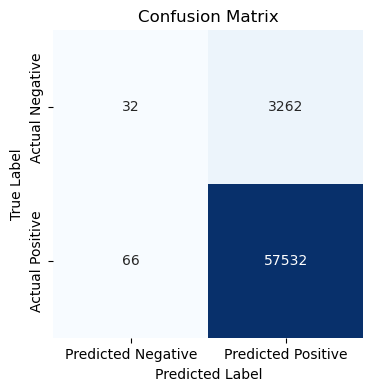

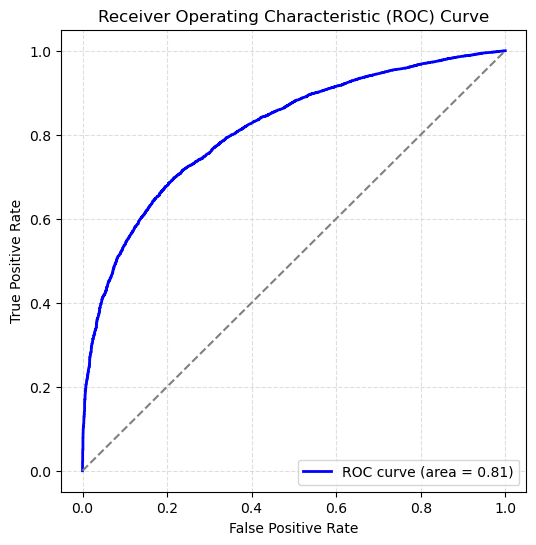

In [49]:
# Step 2: Init the Model
ada = AdaBoostClassifier(random_state=42)

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[    18   9865]
 [     7 172783]]
    
    AUC: 0.8244038700916938

    Classification Report:
                  precision    recall  f1-score   support

           0       0.72      0.00      0.00      9883
           1       0.95      1.00      0.97    172790

    accuracy                           0.95    182673
   macro avg       0.83      0.50      0.49    182673
weighted avg       0.93      0.95      0.92    182673

    
TEST METRICS
    Confusion Matrix: 
    [[    2  3292]
 [    7 57591]]
    
    AUC: 0.8144275758579876

    Classification Report:
                  precision    recall  f1-score   support

           0       0.22      0.00      0.00      3294
           1       0.95      1.00      0.97     57598

    accuracy                           0.95     60892
   macro avg       0.58      0.50      0.49     60892
weighted avg       0.91      0.95      0.92     60892

    


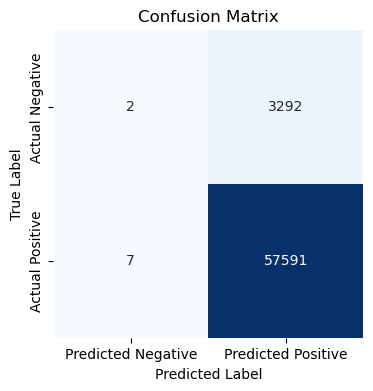

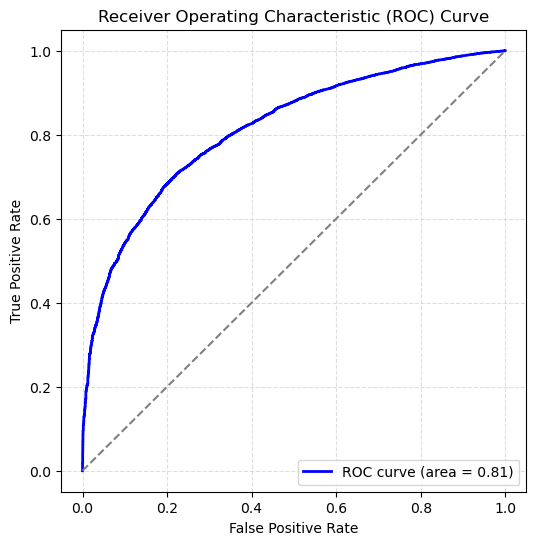

In [50]:
# Step 2: Init the Model
gb = GradientBoostingClassifier(random_state=42)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

In [51]:
 from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

TRAIN METRICS
    Confusion Matrix: 
    [[   364   9519]
 [    49 172741]]
    
    AUC: 0.8684638835050689

    Classification Report:
                  precision    recall  f1-score   support

           0       0.88      0.04      0.07      9883
           1       0.95      1.00      0.97    172790

    accuracy                           0.95    182673
   macro avg       0.91      0.52      0.52    182673
weighted avg       0.94      0.95      0.92    182673

    
TEST METRICS
    Confusion Matrix: 
    [[   40  3254]
 [   76 57522]]
    
    AUC: 0.8057153212729824

    Classification Report:
                  precision    recall  f1-score   support

           0       0.34      0.01      0.02      3294
           1       0.95      1.00      0.97     57598

    accuracy                           0.95     60892
   macro avg       0.65      0.51      0.50     60892
weighted avg       0.91      0.95      0.92     60892

    


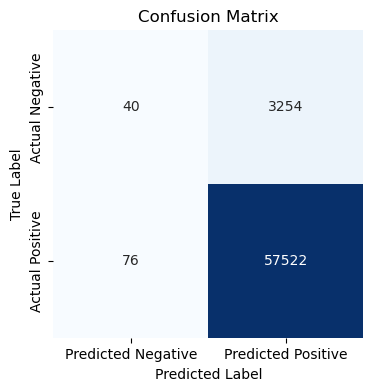

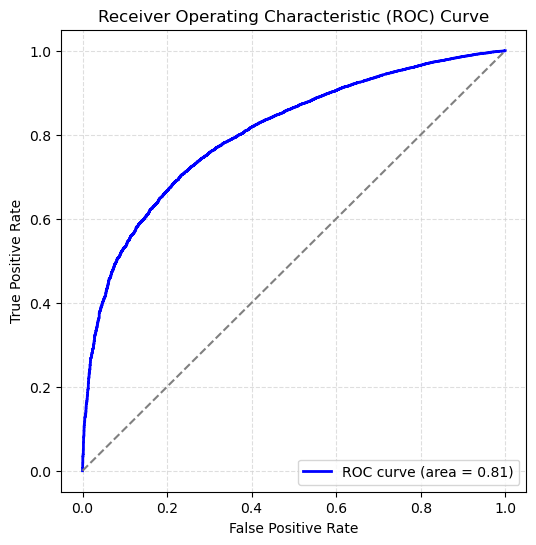

In [52]:
 # Step 2: Init the Model
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

In [53]:
# Train and test columns are the same
temp_cols =[c.replace(' ', '_').replace('-', '_') for c in X_train.columns]
print(temp_cols)

['PhysicalHealthDays', 'SleepHours', 'BMI', 'MentalHealthDays', 'AgeCategory', 'Sex', 'RaceEthnicityCategory', 'SmokerStatus', 'AlcoholDrinkers', 'GeneralHealth']


In [54]:
# X_train_LGBM = X_train.copy()
# X_train_LGBM.columns = temp_cols
# X_test_LGBM = X_test.copy()
# X_test_LGBM.columns = temp_cols

In [55]:
X_train_lgbm, X_test_lgbm = [X.rename(columns=lambda x:re.sub('[^A-Za-z0-9_]+', '', x)) for X in (X_train, X_test)]

TRAIN METRICS
    Confusion Matrix: 
    [[    25   9858]
 [     8 172782]]
    
    AUC: 0.8472812782288466

    Classification Report:
                  precision    recall  f1-score   support

           0       0.76      0.00      0.01      9883
           1       0.95      1.00      0.97    172790

    accuracy                           0.95    182673
   macro avg       0.85      0.50      0.49    182673
weighted avg       0.94      0.95      0.92    182673

    
TEST METRICS
    Confusion Matrix: 
    [[    3  3291]
 [    8 57590]]
    
    AUC: 0.8133367974538177

    Classification Report:
                  precision    recall  f1-score   support

           0       0.27      0.00      0.00      3294
           1       0.95      1.00      0.97     57598

    accuracy                           0.95     60892
   macro avg       0.61      0.50      0.49     60892
weighted avg       0.91      0.95      0.92     60892

    


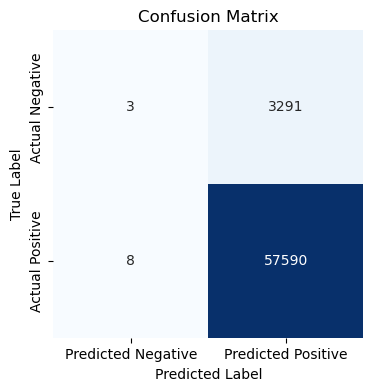

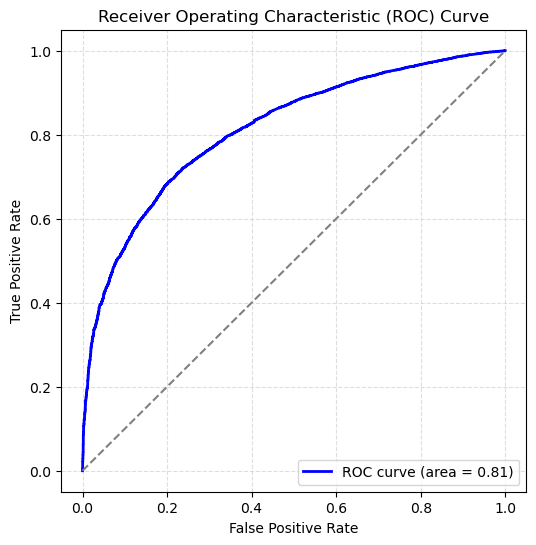

In [56]:
# Step 2: Init the Model 
# 
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# Do Machine Learning
doClassification(lgbm, X_train_lgbm, X_test_lgbm, y_train, y_test)

In [57]:
X_train.columns
# maybe space between name in columns. 

Index(['PhysicalHealthDays', 'SleepHours', 'BMI', 'MentalHealthDays',
       'AgeCategory', 'Sex', 'RaceEthnicityCategory', 'SmokerStatus',
       'AlcoholDrinkers', 'GeneralHealth'],
      dtype='object')

In [58]:
X_test

,PhysicalHealthDays,SleepHours,BMI,MentalHealthDays,AgeCategory,Sex,RaceEthnicityCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
216359,0.0,7.0,34.21,0.0,77,0,0,1,1,0
218017,0.0,7.0,29.70,2.0,62,0,0,1,0,1
44880,0.0,8.0,29.18,10.0,57,1,4,1,0,2
195295,30.0,3.0,29.41,30.0,52,0,0,1,0,2
103106,1.0,8.0,21.03,1.0,83,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
228883,0.0,8.0,31.00,10.0,21,1,0,0,0,1
7987,4.0,8.0,28.19,30.0,62,0,0,1,0,2
44907,30.0,8.0,26.57,30.0,77,0,0,1,1,4
153697,0.0,8.0,23.03,5.0,32,1,0,1,0,1


In [59]:
fi = pd.DataFrame(list(zip(X.columns, gb.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
9,GeneralHealth,0.402023
4,AgeCategory,0.377514
5,Sex,0.128334
2,BMI,0.018784
0,PhysicalHealthDays,0.017738
1,SleepHours,0.017048
7,SmokerStatus,0.014395
8,AlcoholDrinkers,0.014355
6,RaceEthnicityCategory,0.006863
3,MentalHealthDays,0.002946


In [60]:
fi = pd.DataFrame(list(zip(X.columns, xgb.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
9,GeneralHealth,0.287145
4,AgeCategory,0.226751
5,Sex,0.206653
7,SmokerStatus,0.054945
8,AlcoholDrinkers,0.054584
6,RaceEthnicityCategory,0.036223
0,PhysicalHealthDays,0.035646
1,SleepHours,0.035140
2,BMI,0.031522
3,MentalHealthDays,0.031389


In [61]:
fi = pd.DataFrame(list(zip(X.columns, lgbm.feature_importances_ / sum(lgbm.feature_importances_))), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
2,BMI,0.268000
4,AgeCategory,0.152000
1,SleepHours,0.112333
9,GeneralHealth,0.102000
3,MentalHealthDays,0.093333
0,PhysicalHealthDays,0.082667
6,RaceEthnicityCategory,0.058667
5,Sex,0.053000
8,AlcoholDrinkers,0.040000
7,SmokerStatus,0.038000


In [62]:
fi = pd.DataFrame(list(zip(X.columns, ada.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
4,AgeCategory,0.30
1,SleepHours,0.16
9,GeneralHealth,0.16
2,BMI,0.12
0,PhysicalHealthDays,0.06
3,MentalHealthDays,0.06
5,Sex,0.04
6,RaceEthnicityCategory,0.04
8,AlcoholDrinkers,0.04
7,SmokerStatus,0.02


In [63]:
# Retrain the model on the ENTIRE dataset
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X, y)

GradientBoostingClassifier(random_state=42)

In [65]:
 # Save off my models
import pickle

# Scaler
pickle.dump(scaler, open("heartattack_scaler_version_2.h5", 'wb'))

# Model
pickle.dump(gb, open("heartattack_version2.h5", 'wb'))